# Simple Linear Regression

### Importing Packages

In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [123]:
import warnings
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

### Importing Dataset

In [124]:
# Set the number of data points
num_points = 1000

# Generate the x-values for the data points
x = np.random.normal(0, 1, num_points)
y = np.random.normal(0, 1, num_points)

In [125]:
# Combine the x and y values into a single dataset
df = pd.DataFrame({'x':x,'y':y})
df

,x,y
0,-0.547984,0.689976
1,0.692281,-1.039261
2,-1.209846,0.659213
3,1.649049,-1.347786
4,-0.292755,0.794681
...,...,...
995,0.975852,-0.641888
996,-0.753062,0.924488
997,-0.289963,0.024553
998,-1.636250,-0.482309


#### Data Anaysis

In [126]:
print(f"Number of records : {df.shape[0]}")
print(f"Number of column : {df.shape[1]}")

Number of records : 1000
Number of column : 2


In [127]:
print(f'Maximum X value is : {df.x.max()}')
print(f'Minimum X value is : {df.x.min()}\n')
print(f'Maximum Y value is : {df.y.max()}')
print(f'Minimum Y value is : {df.y.min()}')

Maximum X value is : 3.68643918512371
Minimum X value is : -3.0241504638519916

Maximum Y value is : 3.599486932634731
Minimum Y value is : -3.2016505851172186


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1000 non-null   float64
 1   y       1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [129]:
df.describe()

,x,y
count,1000.000000,1000.000000
mean,0.013850,-0.080038
std,0.988660,0.995229
min,-3.024150,-3.201651
25%,-0.616938,-0.761054
50%,0.010961,-0.089867
75%,0.658332,0.571563
max,3.686439,3.599487


<AxesSubplot:>

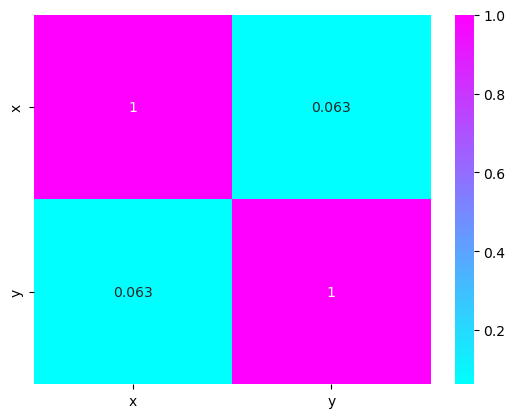

In [130]:
sns.heatmap(df.corr(),annot=True,cmap='cool')

Text(0.5, 1.0, 'Distribution of y Axis')

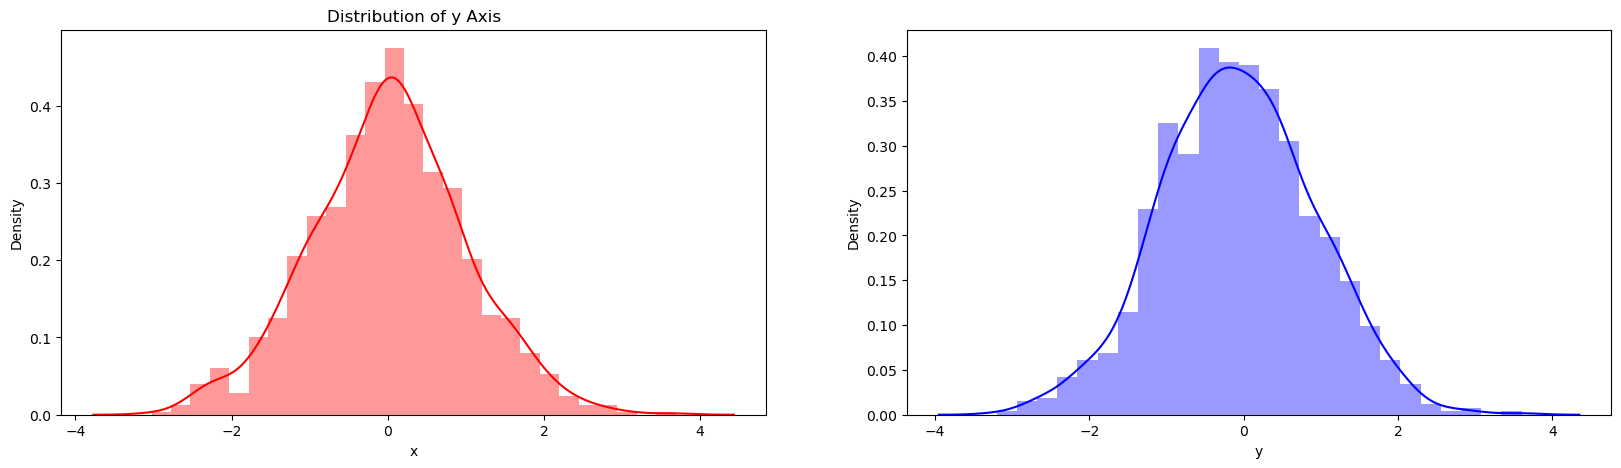

In [131]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
sns.distplot(df['x'],color='r',ax=ax1)
ax1.set_title('Distribution of X Axis')
sns.distplot(df['y'],color='b',ax=ax2)
ax1.set_title('Distribution of y Axis')

### Train Test Split

In [132]:
shuffle = df.sample(frac=1)
train_size = int(0.7* len(df))
train = shuffle[:train_size]
test = shuffle[train_size:]

In [133]:
print(f"Shape of training data: {train.shape}")
print(f"Shape of test data : {test.shape}")

Shape of training data: (700, 2)
Shape of test data : (300, 2)


In [134]:
x_train = train['x']
y_train = train['y']
x_test  = train['x']
y_test  = train['y']

# Simple Linear Regression
### y = m * x + c
#### m = slope
#### c = intercept

### Simple Linear Model

In [135]:
def SimpleRegressionModel(x_train,y_train):
    N = len(x_train)
    numerator = 0
    denominator = 0
    
    x_mean = x_train.mean()
    y_mean = y_train.mean()
    
    s_yixi   = (y_train * x_train).sum()
    yixi_Byn = (y_train.sum() * x_train.sum())/N
    
    s_xixi = (x_train * x_train).sum()
    xixi_Byn = (x_train.sum() * x_train.sum())/N
    
    slope = (s_yixi - yixi_Byn)/(s_xixi - xixi_Byn)
    
    intercept = y_mean - (slope * x_mean)
    
    return (slope,intercept)

In [136]:
m,c = SimpleRegressionModel(x_train,y_train)
print (f'm = {m} \nc = {c}')
print(f"Equation of Best Fit :\n y = {m} * x + {c}")

m = 0.06421637151036094 
c = -0.08842927740883962
Equation of Best Fit :
 y = 0.06421637151036094 * x + -0.08842927740883962


Text(0, 0.5, 'Y')

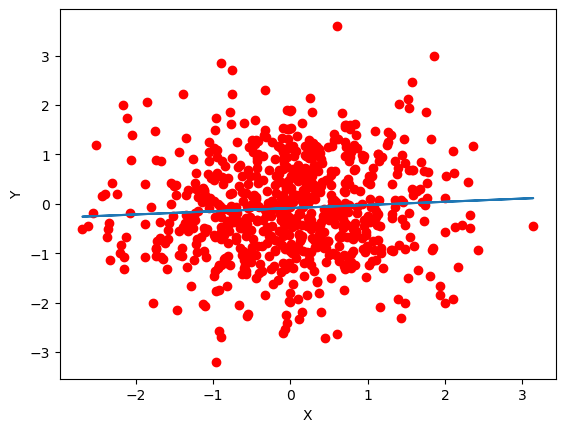

In [137]:
plt.scatter(x_train,y_train,color="red")
plt.plot(x_train,m*x_train+c)
plt.xlabel('X')
plt.ylabel('Y')

In [138]:
def prediction(x_train,slope,intercept):
    predict = x_train * slope + intercept
    return predict

In [139]:
y_pred = prediction(x_test,m,c)

In [140]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_pred,y_test))

0.9905043946239928


## Gradient Descent

In [141]:
class GradientDescent:
    def __init__(self,lr=0.001,epochs=500):
        self.lr,self.epochs=lr,epochs
    def fit(self,x,y):
        m=5
        c=0
        n=x.shape[0]
        for i in range(self.epochs):
            y_pred=m*x+c
            m_gradient=(-2/n)*(np.sum(x*(y-y_pred)))
            c_gradient=(-2/n)*(np.sum(y-y_pred))
            m=m-(self.lr*m_gradient)
            c=c+(self.lr*c_gradient)
        self.m,self.c=m,c
    def predict(self,x):
        y=self.m*x+self.c
        return y

In [142]:
lr =GradientDescent()
lr.fit(x,y)
y_pred=lr.predict(x)

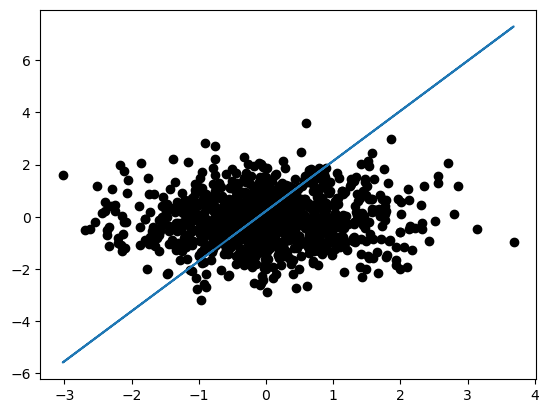

In [143]:
plt.scatter(x,y,c='black')
plt.plot(x,y_pred)

### Mean Absolute Error and Mean Absolute Percentage Error

In [144]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_pred,y))

4.454378027216778


## SK Learn Model

In [145]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [146]:
reg = LinearRegression()

In [147]:
reg.fit(x_train.reshape(-1, 1), y_train)

LinearRegression()

In [148]:
y_pred = reg.predict(x_test.reshape(-1, 1))

In [149]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_pred,y_test))

0.8491657356170248
